In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [6]:
#fashion_mnist = input_data.read_data_sets('data/fashion-data/')
#(train_images,train_labels),(test_images,test_labels) = fashion_mnist

Extracting data/fashion-data/train-images-idx3-ubyte.gz
Extracting data/fashion-data/train-labels-idx1-ubyte.gz
Extracting data/fashion-data/t10k-images-idx3-ubyte.gz
Extracting data/fashion-data/t10k-labels-idx1-ubyte.gz


In [5]:
fashion_mnist2 = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist2.load_data()

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

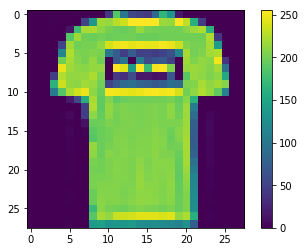

In [47]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [14]:
train_images = train_images /255.0
test_images = test_images /255.0

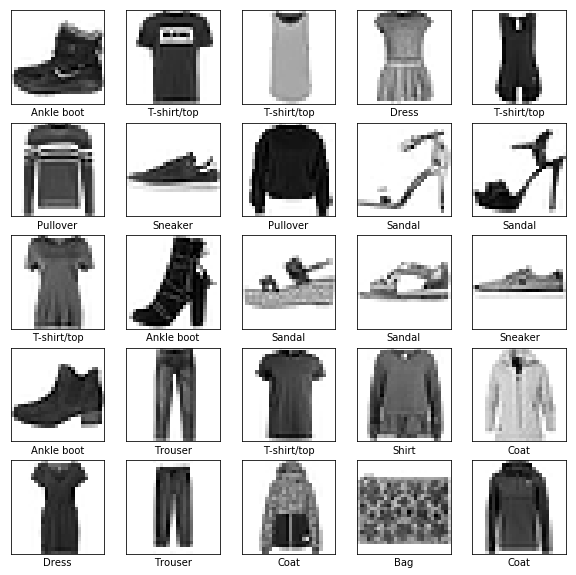

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 1.0931 - acc: 0.6665
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6442 - acc: 0.7681
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5676 - acc: 0.7970
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5250 - acc: 0.8134
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4971 - acc: 0.8253


In [22]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("测试率:",test_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.5111 - acc: 0.8188
测试率: 0.8188


In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([1.5154775e-06, 3.2736121e-08, 9.4470161e-06, 7.6806482e-06,
       1.9683343e-05, 1.5030201e-01, 1.8483894e-05, 3.7828419e-01,
       5.4720188e-03, 4.6588495e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

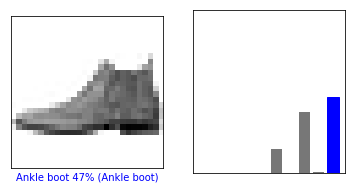

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

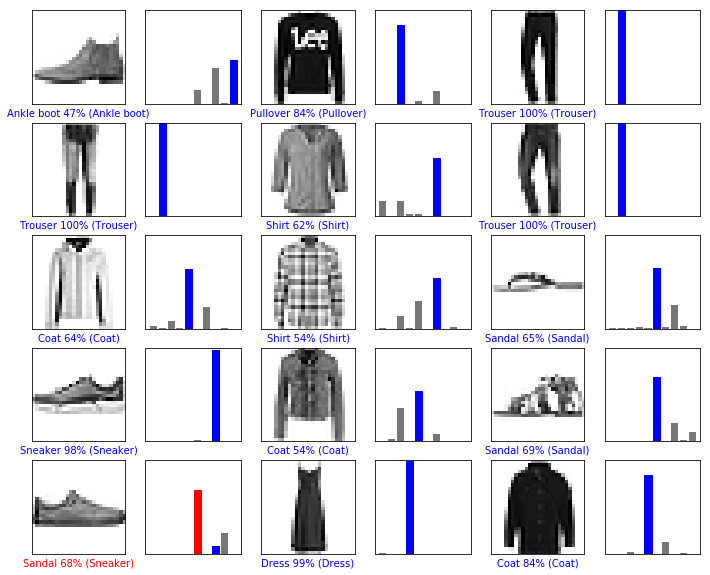

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows *num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

In [34]:
img = test_images[0]
print(img.shape)

(28, 28)


In [35]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.5154745e-06 3.2736121e-08 9.4470161e-06 7.6806482e-06 1.9683323e-05
  1.5030204e-01 1.8483894e-05 3.7828410e-01 5.4720188e-03 4.6588495e-01]]


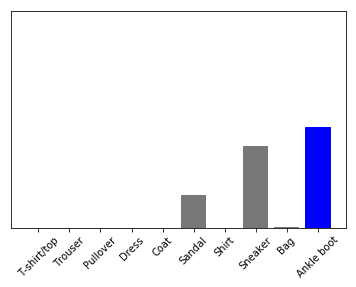

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:
np.argmax(predictions_single[0])

9